In [685]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [686]:
Value1=pd.read_csv("FFACapeOI 010118 190224.csv")
Value1.set_index("Date",inplace=True)
Value1.rename(columns={"Value":"FFACapeO010118"},inplace=True)

In [687]:
Value2=pd.read_csv("FFADV_C3 010118 190224.csv")
Value2.set_index("Date",inplace=True)
Value2.rename(columns={"Value":"C3010118"},inplace=True)

In [688]:
di_ex=["FFACapeOI 010118 190224.csv",
"FFADV_C3 010118 190224.csv",
"FFADV_C5 010118 190224.csv",
"FFADV_C5TC 010118 190224.csv",
"FFADV_C7 010118 190224.csv",
"FFADVCape_T 020707 190224.csv","ODV_C5TC 010118 190224.csv","OptionsCapeOI 010118 190224.csv"]

In [689]:
Value3=pd.read_csv("FFADV_C5 010118 190224.csv")
Value3.set_index("Date",inplace=True)
Value3.rename(columns={"Value":"C5010118"},inplace=True)

In [690]:
Value4=pd.read_csv("FFADV_C5TC 010118 190224.csv")
Value4.set_index("Date",inplace=True)
Value4.rename(columns={"Value":"C5TC010118"},inplace=True)

In [691]:
Value5=pd.read_csv("FFADVCape_T 020707 190224.csv")
Value5.set_index("Date",inplace=True)
Value5.rename(columns={"Value":"020707"},inplace=True)

In [692]:
Value6=pd.read_csv("ODV_C5TC 010118 190224.csv")
Value6.set_index("Date",inplace=True)
Value6.rename(columns={"Value":"010118"},inplace=True)

In [693]:
Value7=pd.read_csv("OptionsCapeOI 010118 190224.csv")
Value7.set_index("Date",inplace=True)
Value7.rename(columns={"Value":"CapeOI010118"},inplace=True)

In [694]:
df = pd.concat([Value1,Value2,Value3,Value4,Value5,Value6,Value7],axis=1)

In [695]:
df.reset_index(inplace=True)


In [696]:
df.head()

Date  FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
0  02/01/2018         54040.0       0.0       0.0       475.0   475.0    84.0   
1  08/01/2018         59753.0       0.0       0.0      1360.0  1360.0   180.0   
2  15/01/2018         63213.0       0.0      50.0       730.0   780.0   630.0   
3  22/01/2018         64229.0       0.0       0.0      1480.0  1540.0     0.0   
4  29/01/2018         65683.0       0.0       0.0       414.0   414.0  1395.0   

   CapeOI010118  
0       77208.0  
1       80202.0  
2       81912.0  
3       82662.0  
4       89262.0

In [697]:



df["Date"]=pd.to_datetime(df["Date"])

In [698]:
df = (df.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [699]:
df.set_index("Date",inplace=True)

In [700]:
df[df.index=='07/01/2020']

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2020-07-01        124002.0      50.0     220.0      2420.0  2690.0  4500.0   

            CapeOI010118  
Date                      
2020-07-01      168068.0

In [701]:
df_M=df.resample("W").mean()

In [702]:
df_M.fillna(method="ffill",inplace=True)

In [703]:
df_M.tail()

FFACapeO010118   C3010118    C5010118   C5TC010118       020707  \
Date                                                                          
2023-11-19        170528.0   0.000000  546.428571  6389.428571  6935.857143   
2023-11-26        177120.0   0.000000  351.428571  9497.000000  9848.428571   
2023-12-03        190389.0  31.428571  392.857143  7529.428571  7953.714286   
2023-12-10        188544.0   3.571429  289.285714  3921.000000  4213.857143   
2023-12-17        187806.0  25.000000  233.333333  5345.666667  5604.000000   

                 010118   CapeOI010118  
Date                                    
2023-11-19   320.000000  152915.000000  
2023-11-26   522.857143  153805.000000  
2023-12-03  1821.428571  156415.000000  
2023-12-10  2462.857143  155156.428571  
2023-12-17  1310.000000  154653.000000

In [704]:
Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)


In [705]:
Data_1.head()

Unnamed: 0  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  \
Date                                                                      
2014-06-02           0      13825.0     16590.0     19070.0     23014.0   
2014-06-03           1      15010.0     18002.0     20302.0     23880.0   
2014-06-04           2      15050.0     18052.0     20372.0     23850.0   
2014-06-05           3      14715.0     17748.0     20094.0     23630.0   
2014-06-06           4      14812.0     17762.0     20114.0     23700.0   

            5TC_C+4MON  5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  \
Date                                                               ...   
2014-06-02     25734.0           0    13825.0   19558.0   27098.0  ...   
2014-06-03     26872.0           0    15010.0   20728.0   28084.0  ...   
2014-06-04     27132.0           0    15050.0   20758.0   27971.0  ...   
2014-06-05     27382.0           0    14715.0   20491.0   27581.0  ...   
2014-06-06     27548.0           0    14812.0   20525.0   27650.0  ...   

            5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                           
2014-06-02   18853.0   24375.0   30023.0     21981.0     20808.0     20254.0   
2014-06-03   19230.0   24893.0   30483.0     22445.0     21051.0     20396.0   
2014-06-04   19220.0   24808.0   30588.0     22473.0     21001.0     20386.0   
2014-06-05   18918.0   24480.0   30370.0     22267.0     20900.0     20295.0   
2014-06-06   18958.0   24553.0   30473.0     22287.0     20940.0     20294.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2014-06-02     19745.0     19585.0     19418.0     19258.0  
2014-06-03     19836.0     19625.0     19458.0     19298.0  
2014-06-04     19826.0     19625.0     19458.0     19298.0  
2014-06-05     19695.0     19514.0     19357.0     19187.0  
2014-06-06     19695.0     19504.0     19579.0     19177.0  

[5 rows x 21 columns]

In [706]:
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)

In [707]:
Data=pd.concat([Data_2,Data_1,Data_3],axis=0)

In [708]:
Data=Data.iloc[:,1:]

In [709]:
Data

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...                 ...         ...         ...         ...         ...   
2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2019-01-02         0.0    14050.0   14242.0   16808.0   20358.0   15300.0   
2019-01-03         0.0    13508.0   13658.0   16483.0   20100.0   15150.0   
2019-01-04         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-07         0.0    14447.0   14158.0   16817.0   20442.0   15208.0   
2019-01-08         0.0    14556.0   14258.0   16942.0   20442.0   15183.0   
...                ...        ...       ...       ...       ...       ...   
2024-02-26     26536.0    22304.0   27467.0   26464.0   26407.0   16093.0   
2024-02-27     27157.0    23039.0   28564.0   27204.0   27039.0   16379.0   
2024-02-28     28000.0    24162.0   30476.0   28125.0   27664.0   16736.0   
2024-02-29     27164.0    24105.0   30101.0   27093.0   26818.0   16443.0   
2024-03-01     28429.0    25678.0   32963.0   28211.0   27907.0   17050.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2019-01-02   15146.0   15683.0     15692.0     13342.0     13408.0   
2019-01-03   15025.0   15567.0     15508.0     13304.0     13396.0   
2019-01-04   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-07   15192.0   15767.0     15717.0     13417.0     13475.0   
2019-01-08   15208.0   15783.0     15746.0     13417.0     13483.0   
...              ...       ...         ...         ...         ...   
2024-02-26   19871.0   22893.0     20907.0     19907.0     18936.0   
2024-02-27   20114.0   23171.0     21239.0     20114.0     19057.0   
2024-02-28   20600.0   23636.0     21736.0     20486.0     19436.0   
2024-02-29   20464.0   23514.0     21489.0     20350.0     19336.0   
2024-03-01   21121.0   24174.0     22143.0     20643.0     19539.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2019-01-02     13783.0     14050.0     14054.0     14054.0  
2019-01-03     13733.0     14033.0     14033.0     14033.0  
2019-01-04     13738.0     14046.0     14038.0     14038.0  
2019-01-07     13767.0     14075.0     14058.0     14058.0  
2019-01-08     13767.0     14075.0     14050.0     14050.0  
...                ...         ...         ...         ...  
2024-02-26     18443.0     18179.0     18107.0     18057.0  
2024-02-27     18543.0     18250.0     18164.0     18107.0  
2024-02-28     18829.0     18393.0     18300.0     18243.0  
2024-02-29     18814.0     18379.0     18300.0     18250.0  
2024-03-01     19021.0     18483.0     18350.0     18357.0  

[2541 rows x 20 columns]

In [710]:
Data.reset_index(inplace=True)

In [711]:
Data

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
1    2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2    2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
3    2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
4    2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...         ...          ...         ...         ...         ...         ...   
2536 2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2537 2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2538 2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2539 2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2540 2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    14050.0   14242.0   16808.0  ...   15300.0   15146.0   
1            0.0    13508.0   13658.0   16483.0  ...   15150.0   15025.0   
2            0.0    13593.0   13704.0   16467.0  ...   15150.0   15054.0   
3            0.0    14447.0   14158.0   16817.0  ...   15208.0   15192.0   
4            0.0    14556.0   14258.0   16942.0  ...   15183.0   15208.0   
...          ...        ...       ...       ...  ...       ...       ...   
2536     26536.0    22304.0   27467.0   26464.0  ...   16093.0   19871.0   
2537     27157.0    23039.0   28564.0   27204.0  ...   16379.0   20114.0   
2538     28000.0    24162.0   30476.0   28125.0  ...   16736.0   20600.0   
2539     27164.0    24105.0   30101.0   27093.0  ...   16443.0   20464.0   
2540     28429.0    25678.0   32963.0   28211.0  ...   17050.0   21121.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      15683.0     15692.0     13342.0     13408.0     13783.0     14050.0   
1      15567.0     15508.0     13304.0     13396.0     13733.0     14033.0   
2      15592.0     15533.0     13317.0     13442.0     13738.0     14046.0   
3      15767.0     15717.0     13417.0     13475.0     13767.0     14075.0   
4      15783.0     15746.0     13417.0     13483.0     13767.0     14075.0   
...        ...         ...         ...         ...         ...         ...   
2536   22893.0     20907.0     19907.0     18936.0     18443.0     18179.0   
2537   23171.0     21239.0     20114.0     19057.0     18543.0     18250.0   
2538   23636.0     21736.0     20486.0     19436.0     18829.0     18393.0   
2539   23514.0     21489.0     20350.0     19336.0     18814.0     18379.0   
2540   24174.0     22143.0     20643.0     19539.0     19021.0     18483.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        14054.0     14054.0  
1        14033.0     14033.0  
2        14038.0     14038.0  
3        14058.0     14058.0  
4        14050.0     14050.0  
...          ...         ...  
2536     18107.0     18057.0  
2537     18164.0     18107.0  
2538     18300.0     18243.0  
2539     18300.0     18250.0  
2540     18350.0     18357.0  

[2541 rows x 21 columns]

In [712]:
Data=Data.drop_duplicates()

In [713]:
Data_F = (Data.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [714]:
Data_F

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
1    2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2    2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
3    2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
4    2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
...         ...          ...         ...         ...         ...         ...   
2137 2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2138 2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2139 2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2140 2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2141 2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    13465.0   16653.0   18270.0  ...   13830.0   14830.0   
1            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
2            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
3            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
4            0.0    13925.0   16943.0   18630.0  ...   14060.0   15080.0   
...          ...        ...       ...       ...  ...       ...       ...   
2137     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2138     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2139     15657.0    27763.0   12606.0   16175.0  ...   19625.0   11779.0   
2140     16350.0    28734.0   13763.0   17057.0  ...   19986.0   12136.0   
2141     16136.0    28207.0   12758.0   16639.0  ...   19714.0   11943.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      16790.0     16520.0     15530.0     15140.0     15000.0     15010.0   
1      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
2      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
3      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
4      16970.0     16790.0     15640.0     15210.0     15030.0     15030.0   
...        ...         ...         ...         ...         ...         ...   
2137   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2138   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2139   15629.0     16821.0     16200.0     16436.0     16443.0     16386.0   
2140   15971.0     17534.0     16554.0     16657.0     16629.0     16543.0   
2141   15779.0     17030.0     16271.0     16604.0     16604.0     16507.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        15490.0     15530.0  
1        15510.0     15540.0  
2        15510.0     15540.0  
3        15510.0     15540.0  
4        15520.0     15540.0  
...          ...         ...  
2137     16307.0     16307.0  
2138     16307.0     16307.0  
2139     16279.0     16279.0  
2140     16421.0     16400.0  
2141     16386.0     16371.0  

[2142 rows x 21 columns]

In [715]:

Data_F.set_index("Date",inplace=True)

In [716]:
Data_F.head(10)

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
2018-02-06      13430.0     16380.0     17410.0     17450.0     17430.0   
2018-02-07      13220.0     16320.0     17350.0     17500.0     17500.0   
2018-02-08      13850.0     16860.0     18010.0     17720.0     17670.0   
2018-02-09      14350.0     16970.0     18150.0     17780.0     17710.0   
2018-02-10      14350.0     16970.0     18150.0     17780.0     17710.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2018-02-01         0.0    13465.0   16653.0   18270.0   21480.0   13830.0   
2018-02-02         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-03         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-04         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-05         0.0    13925.0   16943.0   18630.0   21790.0   14060.0   
2018-02-06         0.0    14905.0   17430.0   18870.0   21940.0   14240.0   
2018-02-07         0.0    14770.0   17450.0   18950.0   22230.0   14380.0   
2018-02-08         0.0    15355.0   17800.0   19050.0   22310.0   14530.0   
2018-02-09         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   
2018-02-10         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2018-02-01   14830.0   16790.0     16520.0     15530.0     15140.0   
2018-02-02   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-03   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-04   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-05   15080.0   16970.0     16790.0     15640.0     15210.0   
2018-02-06   15180.0   17070.0     16940.0     15730.0     15270.0   
2018-02-07   15260.0   17200.0     17040.0     15740.0     15250.0   
2018-02-08   15350.0   17330.0     17090.0     15910.0     15310.0   
2018-02-09   15400.0   17360.0     17140.0     15960.0     15332.0   
2018-02-10   15400.0   17360.0     17140.0     15960.0     15332.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2018-02-01     15000.0     15010.0     15490.0     15530.0  
2018-02-02     15010.0     15020.0     15510.0     15540.0  
2018-02-03     15010.0     15020.0     15510.0     15540.0  
2018-02-04     15010.0     15020.0     15510.0     15540.0  
2018-02-05     15030.0     15030.0     15520.0     15540.0  
2018-02-06     15160.0     15150.0     15530.0     15550.0  
2018-02-07     15180.0     15190.0     15540.0     15560.0  
2018-02-08     15220.0     15220.0     15570.0     15590.0  
2018-02-09     15250.0     15250.0     15570.0     15590.0  
2018-02-10     15250.0     15250.0     15570.0     15590.0

In [717]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [718]:
Data_2.shape

(2142, 20)

In [719]:
Data_W=Data_2.resample("W-Sun").mean()

In [720]:
# Data_W=Data_2

In [721]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [722]:
Data_W.tail()

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON    5TC_C+3MON  \
Date                                                                 
2023-11-19  20233.000000  17023.714286  11639.142857   7338.428571   
2023-11-26  21134.142857  19484.285714  13772.571429   8661.285714   
2023-12-03  31274.428571  22428.714286  13113.857143  11468.142857   
2023-12-10  32528.857143  15778.428571   9779.000000  11963.142857   
2023-12-17  35144.333333  16623.666667  10278.666667  12225.000000   

              5TC_C+4MON    5TC_C+5MON     5TC_CCURQ      5TC_C+1Q  \
Date                                                                 
2023-11-19  10434.714286  12278.285714  20938.000000   9804.285714   
2023-11-26  11403.714286  12967.571429  22058.285714  11279.000000   
2023-12-03  13490.714286  14885.857143  27179.714286  13750.714286   
2023-12-10  13521.428571  15276.571429  27362.857143  12506.857143   
2023-12-17  14269.000000  16047.666667  28234.666667  13042.333333   

                5TC_C+2Q      5TC_C+3Q      5TC_C+4Q      5TC_C+5Q  \
Date                                                                 
2023-11-19  14230.857143  17311.285714  17547.000000   9878.000000   
2023-11-26  15060.428571  18123.428571  18324.714286  10571.571429   
2023-12-03  16478.000000  19299.428571  19557.000000  11683.714286   
2023-12-10  15729.571429  18661.428571  19264.285714  11577.142857   
2023-12-17  16623.666667  19071.666667  19775.000000  11952.666667   

                5TC_C+6Q    5TC_C+1CAL    5TC_C+2CAL    5TC_C+3CAL  \
Date                                                                 
2023-11-19  14547.142857  14723.571429  14900.571429  15744.857143   
2023-11-26  15038.857143  15697.000000  15616.000000  15929.714286   
2023-12-03  15867.428571  17271.285714  16540.000000  16490.857143   
2023-12-10  15561.285714  16540.571429  16108.000000  16410.000000   
2023-12-17  15793.000000  17128.333333  16341.666667  16565.666667   

              5TC_C+4CAL    5TC_C+5CAL    5TC_C+6CAL    5TC_C+7CAL  
Date                                                                
2023-11-19  15825.857143  15819.857143  15823.571429  15808.000000  
2023-11-26  15956.142857  15924.285714  15883.714286  15872.714286  
2023-12-03  16462.714286  16347.857143  16190.857143  16181.714286  
2023-12-10  16416.428571  16381.571429  16275.428571  16276.428571  
2023-12-17  16558.666667  16478.666667  16362.000000  16350.000000

In [723]:
Data_new=pd.concat([Data_W,df_M],axis=1)

In [724]:
Data_new.isnull().sum()

5TC_CCURMON       0
5TC_C+1MON        0
5TC_C+2MON        0
5TC_C+3MON        0
5TC_C+4MON        0
5TC_C+5MON        0
5TC_CCURQ         0
5TC_C+1Q          0
5TC_C+2Q          0
5TC_C+3Q          0
5TC_C+4Q          0
5TC_C+5Q          0
5TC_C+6Q          0
5TC_C+1CAL        0
5TC_C+2CAL        0
5TC_C+3CAL        0
5TC_C+4CAL        0
5TC_C+5CAL        0
5TC_C+6CAL        0
5TC_C+7CAL        0
FFACapeO010118    0
C3010118          0
C5010118          0
C5TC010118        0
020707            0
010118            0
CapeOI010118      0
dtype: int64

In [725]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)



Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

Value                                      0
Value_fshift_3                             0
Value_fshift_7                             0
Value_fshift_14                            0
Value_fshift_21                            0
                                          ..
Avg_Valuest_rollm_210-Valuest_rollm_49     0
Avg_Valuest_rollm_210-Valuest_rollm_63     0
Avg_Valuest_rollm_210-Valuest_rollm_90     0
Avg_Valuest_rollm_210-Valuest_rollm_120    0
Avg_Valuest_rollm_210-Valuest_rollm_180    0
Length: 387, dtype: int64

In [726]:
Tag_f.drop("shift_30",axis=1,inplace=True)

In [727]:
Tag_f.fillna(method="ffill",inplace=True)

In [728]:
Tag_f=Tag_f.iloc[:,:]

In [729]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-2)

In [730]:
Tag_f.shape

(307, 387)

In [731]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [732]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_4"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [733]:
Imp_f= {k:v for k,v in cor.items() if v>.50 or v<-.50}
len(Imp_f)

163

In [734]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [735]:
keys

['Value',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_fshift_14',
 'Value_fshift_21',
 'Value_fshift_28',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_rollm_35',
 'Value_rollm_42',
 'Value_rollm_49',
 'Value_rollm_54',
 'Value_rollm_63',
 'Value_rollm_70',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'Value_ewm_21',
 'Value_ewm_28',
 'Value_ewm_35',
 'Value_ewm_42',
 'Value_ewm_49',
 'Value_ewm_54',
 'Value_Delta_49',
 'Value_Delta_54',
 'Value_Delta_63',
 'Value_Delta_70',
 'Value_Delta_90',
 'Value_Delta_100',
 'Value_Delta_150',
 'Value_Delta_180',
 'Value_Delta_210',
 'Value_Delta_1_3',
 'Value_Delta_1_4',
 'Value_Delta_2_3',
 'Value_Delta_2_4',
 'ValueSlope_90shift',
 'ValueSlope_100shift',
 'ValueSlope_120shift',
 'Value_Delta_120',
 'RCI_Value_56',
 'RCI_Value_70',
 'RCI_Value_84',
 'RCI_Value_90',
 'RCI_Value_120',
 'RCI_Value_150',
 'RCI_Value_180',
 'stochastic',
 'Stochastic_63',
 'Stochastic_70',
 'Stochastic_90

In [736]:
Data_new.fillna(method="ffill")

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON    5TC_C+3MON  \
Date                                                                 
2018-02-04  12550.000000  15512.500000  16677.500000  17007.500000   
2018-02-11  13704.285714  16562.857143  17694.285714  17581.428571   
2018-02-18  13035.714286  16048.571429  17661.428571  17481.428571   
2018-02-25  12987.142857  16567.142857  18900.000000  18472.857143   
2018-03-04  14391.428571  17017.142857  17928.571429  17986.428571   
...                  ...           ...           ...           ...   
2023-11-19  20233.000000  17023.714286  11639.142857   7338.428571   
2023-11-26  21134.142857  19484.285714  13772.571429   8661.285714   
2023-12-03  31274.428571  22428.714286  13113.857143  11468.142857   
2023-12-10  32528.857143  15778.428571   9779.000000  11963.142857   
2023-12-17  35144.333333  16623.666667  10278.666667  12225.000000   

              5TC_C+4MON    5TC_C+5MON     5TC_CCURQ      5TC_C+1Q  \
Date                                                                 
2018-02-04  17167.500000      0.000000  14031.250000  16950.750000   
2018-02-11  17551.428571      0.000000  15133.571429  17609.000000   
2018-02-18  17532.857143      0.000000  14542.142857  17558.571429   
2018-02-25  18442.857143      0.000000  14777.142857  18605.142857   
2018-03-04  18427.142857      0.000000  14721.428571  17915.142857   
...                  ...           ...           ...           ...   
2023-11-19  10434.714286  12278.285714  20938.000000   9804.285714   
2023-11-26  11403.714286  12967.571429  22058.285714  11279.000000   
2023-12-03  13490.714286  14885.857143  27179.714286  13750.714286   
2023-12-10  13521.428571  15276.571429  27362.857143  12506.857143   
2023-12-17  14269.000000  16047.666667  28234.666667  13042.333333   

                5TC_C+2Q      5TC_C+3Q  ...    5TC_C+5CAL    5TC_C+6CAL  \
Date                                    ...                               
2018-02-04  18502.500000  21652.500000  ...  15017.500000  15505.000000   
2018-02-11  18958.571429  22192.857143  ...  15191.428571  15552.857143   
2018-02-18  18802.857143  22447.142857  ...  15202.857143  15527.142857   
2018-02-25  19694.285714  23458.571429  ...  15327.142857  15612.857143   
2018-03-04  19327.857143  23607.142857  ...  15302.857143  15585.714286   
...                  ...           ...  ...           ...           ...   
2023-11-19  14230.857143  17311.285714  ...  15819.857143  15823.571429   
2023-11-26  15060.428571  18123.428571  ...  15924.285714  15883.714286   
2023-12-03  16478.000000  19299.428571  ...  16347.857143  16190.857143   
2023-12-10  15729.571429  18661.428571  ...  16381.571429  16275.428571   
2023-12-17  16623.666667  19071.666667  ...  16478.666667  16362.000000   

              5TC_C+7CAL  FFACapeO010118   C3010118    C5010118   C5TC010118  \
Date                                                                           
2018-02-04  15537.500000    54040.000000   0.000000   12.500000   638.750000   
2018-02-11  15572.857143    62860.000000   0.000000    2.857143  1954.285714   
2018-02-18  15564.285714    66388.000000   0.000000    0.000000  1043.571429   
2018-02-25  15662.857143    64999.000000   0.000000   32.142857  1218.000000   
2018-03-04  15625.714286    67013.285714   0.000000   21.428571  1954.142857   
...                  ...             ...        ...         ...          ...   
2023-11-19  15808.000000   170528.000000   0.000000  546.428571  6389.428571   
2023-11-26  15872.714286   177120.000000   0.000000  351.428571  9497.000000   
2023-12-03  16181.714286   190389.000000  31.428571  392.857143  7529.428571   
2023-12-10  16276.428571   188544.000000   3.571429  289.285714  3921.000000   
2023-12-17  16350.000000   187806.000000  25.000000  233.333333  5345.666667   

                 020707       010118   CapeOI010118  
Date                                                 
2018-02-04   848.750000    21.000000   77208.000000  
2018-02-11  

In [737]:
Final=pd.concat([Data_new,Tag_f[keys]],axis=1)

In [738]:
Final.isnull().sum()

5TC_CCURMON                       0
5TC_C+1MON                        0
5TC_C+2MON                        0
5TC_C+3MON                        0
5TC_C+4MON                        0
                                 ..
EMA_Value_ewm_210-Value_ewm_21    0
EMA_Value_ewm_210-Value_ewm_35    0
EMA_Value_ewm_210-Value_ewm_49    0
EMA_Value_ewm_210-Value_ewm_63    0
shift_4                           2
Length: 190, dtype: int64

In [739]:
Data_f=Final.iloc[:-4,:]

In [740]:
Data_f.isnull().sum()

5TC_CCURMON                       0
5TC_C+1MON                        0
5TC_C+2MON                        0
5TC_C+3MON                        0
5TC_C+4MON                        0
                                 ..
EMA_Value_ewm_210-Value_ewm_21    0
EMA_Value_ewm_210-Value_ewm_35    0
EMA_Value_ewm_210-Value_ewm_49    0
EMA_Value_ewm_210-Value_ewm_63    0
shift_4                           0
Length: 190, dtype: int64

In [741]:
Data_f.shape

(303, 190)

In [742]:
Data_f.dropna(axis=1,inplace=True)

In [743]:
Data_f.shape

(303, 190)

In [744]:
f_c=list(Data_f.columns)

In [745]:
f_c.remove("shift_4")

In [746]:
f_c[-10:]

['EMA_Value_ewm_150-Value_ewm_21',
 'EMA_Value_ewm_150-Value_ewm_35',
 'EMA_Value_ewm_150-Value_ewm_49',
 'EMA_Value_ewm_150-Value_ewm_63',
 'EMA_Value_ewm_150-Value_ewm_90',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_35',
 'EMA_Value_ewm_210-Value_ewm_49',
 'EMA_Value_ewm_210-Value_ewm_63']

In [747]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_4"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [748]:
Data_f.shape

(303, 190)

In [749]:
Imp_f= {k:v for k,v in cor.items() if v>.53 or v<-.65}
len(Imp_f)

130

In [750]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [751]:
sorted_dict

{'shift_4': 1.0,
 'Value': 0.8377614294357479,
 '5TC_C+1MON': 0.8292132692234393,
 'Value_rollm_3': 0.8148323415159063,
 '5TC_CCURMON': 0.8004229517655872,
 '5TC_CCURQ': 0.7945434331353101,
 'Value_ewm_3': 0.7891105368744301,
 'Value_rollm_7': 0.7767874366179686,
 'Value_fshift_3': 0.7659855161689333,
 'Value_ewm_7': 0.753242539388286,
 'EMA_Value_ewm_3-Value_ewm_210': 0.7511599193273909,
 'EMA_Value_ewm_3-Value_ewm_180': 0.7442640313040081,
 'EMA_Value_ewm_3-Value_ewm_150': 0.7333900487027968,
 'Value_rollm_14': 0.7228802744077254,
 'EMA_Value_ewm_3-Value_ewm_120': 0.7158261272636643,
 '5TC_C+2MON': 0.7144107915402435,
 'Value_ewm_14': 0.7097046011368825,
 'EMA_Value_ewm_14-Value_ewm_210': 0.7027468699270869,
 'EMA_Value_ewm_14-Value_ewm_180': 0.700812126515148,
 'EMA_Value_ewm_3-Value_ewm_100': 0.6981947191542132,
 'EMA_Value_ewm_14-Value_ewm_150': 0.6963378188352638,
 'Value_rollm_21': 0.6916576606606288,
 'EMA_Value_ewm_14-Value_ewm_120': 0.6872478371477283,
 'EMA_Value_ewm_3-Value

In [752]:
Data_f=Data_f[keys]

In [753]:
Data_f.shape

(303, 130)

In [754]:
f_c=list(Data_f.columns)

f_c.remove("shift_4")

In [755]:
len(f_c)

129

In [756]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [757]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [758]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [759]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [760]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [77]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [761]:
Data_f.reset_index(inplace=True)

In [762]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [763]:
Data_f.head()

Date   5TC_CCURMON    5TC_C+1MON    5TC_C+2MON    5TC_C+3MON  \
0 2018-02-04  12550.000000  15512.500000  16677.500000  17007.500000   
1 2018-02-11  13704.285714  16562.857143  17694.285714  17581.428571   
2 2018-02-18  13035.714286  16048.571429  17661.428571  17481.428571   
3 2018-02-25  12987.142857  16567.142857  18900.000000  18472.857143   
4 2018-03-04  14391.428571  17017.142857  17928.571429  17986.428571   

      5TC_CCURQ      5TC_C+1Q      5TC_C+4Q    5TC_C+1CAL         Value  ...  \
0  14031.250000  16950.750000  13920.000000  16561.250000  11473.000000  ...   
1  15133.571429  17609.000000  14412.857143  17040.000000  13037.142857  ...   
2  14542.142857  17558.571429  14411.428571  16987.142857  13103.142857  ...   
3  14777.142857  18605.142857  14810.000000  17555.714286  13241.142857  ...   
4  14721.428571  17915.142857  14885.714286  17695.714286  12632.000000  ...   

   EMA_Value_ewm_210-Value_ewm_21_Delta_1_3  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                               1493.661808   
4                               1284.669638   

   EMA_Value_ewm_210-Value_ewm_21_Delta_1_4  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                               2112.386759   

   EMA_Value_ewm_210-Value_ewm_21_Delta_2_3  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                827.717121   
4                                665.944687   

   EMA_Value_ewm_210-Value_ewm_21_Delta_2_4  week_of_month  week  Month  \
0                                       NaN              1     5      2   
1                                       NaN              2     6      2   
2                                       NaN              3     7      2   
3                                       NaN              4     8      2   
4                               1493.661808              1     9      3   

   Day of Week  Year  Day  
0            6  2018    4  
1            6  2018   11  
2            6  2018   18  
3            6  2018   25  
4            6  2018    4  

[5 rows x 3483 columns]

In [764]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [765]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [766]:
Data_f.set_index("Date",inplace=True)

In [767]:
Data_f=Data_f.iloc[8:,:]

In [768]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [769]:
Data_f.fillna(method="ffill",inplace=True)

In [770]:
Data_f.isnull().sum()

5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_C+3MON     0
5TC_CCURQ      0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 3482, dtype: int64

In [771]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_4"].corr(Data_f.iloc[:,i])

In [772]:
Imp_f= {k:v for k,v in cor.items() if v>=.585 or v<=-.585}
len(Imp_f)

504

In [773]:
Tag_f["Value"].corr(Final['CapeOI010118'])

-0.1630352297267345

In [774]:
sorted_dict

{'shift_4': 1.0,
 'Value': 0.8377614294357479,
 '5TC_C+1MON': 0.8292132692234393,
 'Value_rollm_3': 0.8148323415159063,
 '5TC_CCURMON': 0.8004229517655872,
 '5TC_CCURQ': 0.7945434331353101,
 'Value_ewm_3': 0.7891105368744301,
 'Value_rollm_7': 0.7767874366179686,
 'Value_fshift_3': 0.7659855161689333,
 'Value_ewm_7': 0.753242539388286,
 'EMA_Value_ewm_3-Value_ewm_210': 0.7511599193273909,
 'EMA_Value_ewm_3-Value_ewm_180': 0.7442640313040081,
 'EMA_Value_ewm_3-Value_ewm_150': 0.7333900487027968,
 'Value_rollm_14': 0.7228802744077254,
 'EMA_Value_ewm_3-Value_ewm_120': 0.7158261272636643,
 '5TC_C+2MON': 0.7144107915402435,
 'Value_ewm_14': 0.7097046011368825,
 'EMA_Value_ewm_14-Value_ewm_210': 0.7027468699270869,
 'EMA_Value_ewm_14-Value_ewm_180': 0.700812126515148,
 'EMA_Value_ewm_3-Value_ewm_100': 0.6981947191542132,
 'EMA_Value_ewm_14-Value_ewm_150': 0.6963378188352638,
 'Value_rollm_21': 0.6916576606606288,
 'EMA_Value_ewm_14-Value_ewm_120': 0.6872478371477283,
 'EMA_Value_ewm_3-Value

In [775]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [776]:
X_Final=Data_f[keys]


In [777]:
X_Final.fillna(method="ffill",inplace=True)

In [778]:
X_Final.shape

(295, 504)

In [779]:
X_Final.tail()

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
Date                                                                 
2023-10-22  26630.142857  19783.428571  16110.428571  20841.142857   
2023-10-29  25975.714286  16730.000000  14564.000000  19089.714286   
2023-11-05  16869.000000  14153.142857  10084.714286  18318.428571   
2023-11-12  18355.714286  15302.857143  10278.285714  19738.428571   
2023-11-19  20233.000000  17023.714286  11639.142857  20938.000000   

               5TC_C+1Q      5TC_C+4Q    5TC_C+1CAL         Value  \
Date                                                                
2023-10-22  9257.285714  16876.000000  14253.000000  29770.571429   
2023-10-29  8246.142857  16604.000000  13702.285714  22312.714286   
2023-11-05  8234.571429  16850.714286  13810.571429  16932.571429   
2023-11-12  8848.571429  17074.857143  14120.285714  20517.000000   
2023-11-19  9804.285714  17547.000000  14723.571429  22164.000000   

            Value_fshift_3  Value_rollm_3  ...  \
Date                                       ...   
2023-10-22    20180.571429   27521.761905  ...   
2023-10-29    24989.857143   26629.380952  ...   
2023-11-05    27804.857143   23005.285714  ...   
2023-11-12    29770.571429   19920.761905  ...   
2023-11-19    22312.714286   19871.190476  ...   

            EMA_Value_ewm_150-Value_ewm_7_ewm_3  \
Date                                              
2023-10-22                         -3925.496863   
2023-10-29                         -5389.880666   
2023-11-05                         -5456.670206   
2023-11-12                         -5142.690328   
2023-11-19                         -4975.185222   

            EMA_Value_ewm_150-Value_ewm_7_ewm_4  \
Date                                              
2023-10-22                         -2946.658907   
2023-10-29                         -4313.933541   
2023-11-05                         -4582.554597   
2023-11-12                         -4506.193817   
2023-11-19                         -4499.489035   

            EMA_Value_ewm_150-Value_ewm_7_ewm_6  \
Date                                              
2023-10-22                         -1719.693720   
2023-10-29                         -2871.599199   
2023-11-05                         -3269.519146   
2023-11-12                         -3402.552224   
2023-11-19                         -3555.426179   

            EMA_Value_ewm_150-Value_ewm_7_ewm_8  \
Date                                              
2023-10-22                          -946.522808   
2023-10-29                         -1928.357171   
2023-11-05                         -2342.655132   
2023-11-12                         -2549.110195   
2023-11-19                         -2762.839052   

            EMA_Value_ewm_150-Value_ewm_21_ewm_3  \
Date                                               
2023-10-22                           -987.524882   
2023-10-29                          -2086.665848   
2023-11-05                          -2699.777359   
2023-11-12                          -3043.581718   
2023-11-19                          -3310.451103   

            EMA_Value_ewm_210-Value_ewm_7_ewm_3  \
Date                                              
2023-10-22                         -2915.899661   
2023-10-29                         -4472.674775   
2023-11-05                         -4616.272772   
2023-11-12                         -4369.628026   
2023-11-19                         -4267.514215   

            EMA_Value_ewm_210-Value_ewm_7_ewm_4  \
Date                                              
2023-10-22                         -1899.490161   
2023-10-29                         -3348.192152   
2023-11-05                         -3687.967074   
2023-11-12                         -3676.312417   
2023-11-19                         -3733.284490   

            EMA_Value_ewm_210-Value_ewm_7_ewm_6  \
Date                                              
2023-10-22                          -617.702030   
2023-10-29           

In [780]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [781]:
X_Final.shape

(295, 504)

In [782]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [783]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [784]:
X_Final.fillna(method="ffill",inplace=True)

In [785]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

KeyError: 'UCOEXOT_ewm_4'

In [786]:
Tag_f.head

<bound method NDFrame.head of                    Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2018-02-04  11473.000000    13765.750000    13102.750000     16777.500000   
2018-02-11  13037.142857    11860.857143    13415.000000     12370.000000   
2018-02-18  13103.142857    13765.428571    11963.428571     13679.571429   
2018-02-25  13241.142857    12803.142857    13668.000000     11874.000000   
2018-03-04  12632.000000    13078.000000    12947.142857     13536.142857   
...                  ...             ...             ...              ...   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  36756.000000    37658.000000    50

In [787]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [788]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [789]:
X_Final.shape

(295, 506)

In [790]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_CCURQ', '5TC_C+1Q',
       '5TC_C+4Q', '5TC_C+1CAL', 'Value', 'Value_fshift_3', 'Value_rollm_3',
       ...
       'EMA_Value_ewm_150-Value_ewm_7_ewm_6',
       'EMA_Value_ewm_150-Value_ewm_7_ewm_8',
       'EMA_Value_ewm_150-Value_ewm_21_ewm_3',
       'EMA_Value_ewm_210-Value_ewm_7_ewm_3',
       'EMA_Value_ewm_210-Value_ewm_7_ewm_4',
       'EMA_Value_ewm_210-Value_ewm_7_ewm_6',
       'EMA_Value_ewm_210-Value_ewm_21_ewm_3', 'Value_ewm_49_Delta_1', 'Month',
       'week'],
      dtype='object', length=506)

In [791]:
X=X_Final.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [792]:
50/245

0.20408163265306123

In [793]:
Test=X_Final.iloc[-50:,:]
Test.shape

(50, 506)

In [794]:
Train=X_Final.iloc[:-50,:].sample(frac = 1)

In [795]:
Train[["Value","shift_4"]]

Value       shift_4
Date                                  
2022-08-21   7550.571429   4403.714286
2020-06-07   5889.428571  21276.000000
2020-02-09   3025.428571   2705.428571
2022-03-20  22107.428571  14657.714286
2019-08-18  27995.000000  32814.428571
...                  ...           ...
2021-12-19  27277.714286  19176.000000
2020-11-01  16746.000000  13336.571429
2018-07-29  24834.571429  26013.428571
2021-03-28  18966.142857  22555.714286
2022-03-13  19630.000000  17030.142857

[245 rows x 2 columns]

In [796]:
exp_reg102 = setup(data =Train, target = 'shift_4', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.95) 

In [413]:
V.shape

(234, 10)

In [545]:
X_Final.isnull().sum()

5TC_CCURMON                              0
5TC_C+1MON                               0
5TC_C+2MON                               0
5TC_CCURQ                                0
5TC_C+1Q                                 0
Value                                    0
Value_rollm_3                            0
Value_rollm_7                            0
Value_ewm_3                              0
Value_ewm_7                              0
EMA_Value_ewm_3-Value_ewm_180            0
EMA_Value_ewm_3-Value_ewm_210            0
EMA_Value_ewm_14-Value_ewm_150           0
EMA_Value_ewm_14-Value_ewm_180           0
EMA_Value_ewm_14-Value_ewm_210           0
shift_4                                  0
5TC_CCURMON_fshift_1                     0
5TC_C+1MON_fshift_1                      0
5TC_C+1MON_fshift_2                      0
5TC_C+1MON_fshift_3                      0
5TC_C+1MON_fshift_4                      0
5TC_C+2MON_fshift_1                      0
5TC_C+2MON_fshift_2                      0
5TC_C+2MON_

In [546]:
c=get_config('dataset_transformed')

In [547]:
x=c.columns

In [548]:
V=c

In [549]:
V.head()

5TC_C+1MON  5TC_CCURQ     Value  EMA_Value_ewm_3-Value_ewm_210  \
Date                                                                         
2021-01-24   -0.552889  -0.368294  0.415669                       0.628765   
2018-05-27   -0.681282  -0.511964 -0.603571                       0.013677   
2022-03-27    0.359985  -0.526992 -0.221251                      -0.729558   
2020-11-22   -0.736078  -0.716990 -0.645772                      -0.393687   
2022-01-16   -0.634271  -0.445225 -0.336352                      -1.066702   

                 shift_4  
Date                      
2021-01-24  13855.571289  
2018-05-27  16975.142578  
2022-03-27  13455.000000  
2020-11-22  14029.713867  
2022-01-16  13419.713867

In [797]:
par=create_model("et")

In [ ]:
ensemble_out=ensemble_model(par, n_estimators=100, choose_better=True) 


In [143]:
X_Final.head()

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
Date                                                                 
2018-04-01  10710.000000  13202.857143  15292.857143  12199.714286   
2018-04-08   9471.428571  12288.571429  14382.857143  12048.000000   
2018-04-15   9635.714286  13551.428571  15790.000000  12992.142857   
2018-04-22  10668.571429  15852.857143  17080.000000  14533.857143   
2018-04-29  11709.285714  17008.571429  16620.000000  15112.571429   

                5TC_C+1Q         Value  Value_rollm_3  Value_rollm_7  \
Date                                                                   
2018-04-01  15939.571429   8665.571429    9285.142857    8985.612245   
2018-04-08  16187.142857   7402.285714    8364.666667    8317.714286   
2018-04-15  17102.857143   8308.857143    8125.571429    7679.102041   
2018-04-22  18275.714286  13038.857143    9583.333333    9783.142857   
2018-04-29  17664.285714  17565.428571   12971.047619   15152.244898   

             Value_ewm_3   Value_ewm_7  ...  \
Date                                    ...   
2018-04-01  10415.069724   9801.164109  ...   
2018-04-08   9616.927530   9014.830809  ...   
2018-04-15   9275.489240   8431.164040  ...   
2018-04-22  10247.108572   9560.313656  ...   
2018-04-29  12121.212145  12957.276155  ...   

            EMA_Value_ewm_3-Value_ewm_210_rollm_3  \
Date                                                
2018-04-01                           -4154.230359   
2018-04-08                           -5010.756306   
2018-04-15                           -5453.708495   
2018-04-22                           -4931.852752   
2018-04-29                           -2525.731079   

            EMA_Value_ewm_3-Value_ewm_210_rollm_4  5TC_C+1MON_ewm_3  \
Date                                                                  
2018-04-01                           -3607.074935      14437.433453   
2018-04-08                           -4541.410995      13868.160168   
2018-04-15                           -5203.139547      13785.485492   
2018-04-22                           -4918.360392      14319.235663   
2018-04-29                           -3320.036535      15007.931124   

            5TC_C+1MON_ewm_4  5TC_C+1MON_ewm_6  5TC_C+2MON_ewm_3  \
Date                                                               
2018-04-01      14623.980205      14833.081708      16310.006724   
2018-04-08      14100.713069      14370.577332      15799.469164   
2018-04-15      13980.532759      14227.260518      15796.997481   
2018-04-22      14382.629515      14502.826066      16128.240688   
2018-04-29      14938.370057      14916.561457      16254.172306   

            5TC_C+2MON_ewm_4  5TC_C+1Q_ewm_3  Month  week  
Date                                                       
2018-04-01      16447.127938    16279.066102      4    13  
2018-04-08      15984.611449    16254.713935      4    14  
2018-04-15      15942.031576    16476.100008      4    15  
2018-04-22      16186.419469    16940.721078      4    16  
2018-04-29      16278.180173    17126.014297      4    17  

[5 rows x 53 columns]

In [798]:
T=Test.drop("shift_4",axis=1)

In [799]:
T

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
Date                                                                 
2022-12-11  12356.285714   8944.571429   6473.000000  13838.428571   
2022-12-18  13903.857143   9597.000000   7039.714286  14354.428571   
2022-12-25  13343.285714   9642.285714   8255.714286  12391.428571   
2023-01-01  10224.285714   7661.714286   9286.285714   9057.428571   
2023-01-08  10638.714286   7904.571429  10429.714286   9657.857143   
2023-01-15  10514.714286   7958.428571  10586.857143   9686.714286   
2023-01-22   9890.857143   7426.857143  10410.000000   9242.428571   
2023-01-29   9139.285714   6037.428571   9087.857143   8088.428571   
2023-02-05   5459.285714   7449.571429  10293.285714   7288.857143   
2023-02-12   4616.714286   7863.714286  10812.571429   7181.714286   
2023-02-19   3673.714286   6573.428571   9976.000000   6437.285714   
2023-02-26   3522.571429   7739.857143  10806.571429   6775.714286   
2023-03-05  10671.000000  14491.428571  16547.000000   8062.285714   
2023-03-12  14284.285714  17303.857143  18533.428571   9033.285714   
2023-03-19  15174.714286  18272.142857  20055.428571   9330.142857   
2023-03-26  14321.000000  17807.285714  20665.142857   9045.285714   
2023-04-02  15704.714286  19398.285714  21828.142857  14192.000000   
2023-04-09  17446.285714  21384.142857  22596.857143  20475.714286   
2023-04-16  16260.714286  20192.857143  22256.571429  19569.857143   
2023-04-23  15305.285714  18657.285714  21555.857143  18506.285714   
2023-04-30  17298.428571  19785.285714  21242.285714  18632.000000   
2023-05-07  19466.714286  20220.285714  20370.428571  18539.142857   
2023-05-14  20402.428571  20288.142857  20245.142857  18873.714286   
2023-05-21  18990.142857  18448.000000  18660.285714  17789.857143   
2023-05-28  18380.000000  16736.428571  17329.857143  17015.857143   
2023-06-04  14159.571429  15194.571429  16926.142857  15728.571429   
2023-06-11  13836.714286  16703.428571  18147.857143  15847.000000   
2023-06-18  13456.000000  16641.428571  17502.428571  15720.000000   
2023-06-25  13351.571429  16955.285714  17563.428571  15685.285714   
2023-07-02  14240.142857  15964.285714  16890.142857  15994.571429   
2023-07-09  13146.571429  14205.428571  15869.714286  14407.000000   
2023-07-16  13591.285714  14364.285714  16325.000000  14760.285714   
2023-07-23  12616.285714  13087.571429  15089.000000  13597.714286   
2023-07-30  12877.714286  14077.714286  15313.000000  14089.428571   
2023-08-06  14775.714286  15337.857143  16353.142857  14435.142857   
2023-08-13  14461.857143  15590.428571  16847.428571  14414.857143   
2023-08-20  14169.571429  16082.142857  17521.000000  14481.000000   
2023-08-27  13224.857143  13492.142857  15585.142857  13302.714286   
2023-09-03  12005.142857  13517.428571  15271.571429  12646.714286   
2023-09-10  12048.428571  16010.285714  16661.714286  12727.000000   
2023-09-17  12534.714286  16649.428571  17063.571429  12889.285714   
2023-09-24  13758.142857  18768.714286  17722.714286  13296.857143   
2023-10-01  16616.142857  18981.714286  16905.571429  15317.714286   
2023-10-08  23695.285714  19403.714286  16245.285714  19781.285714   
2023-10-15  25101.285714  19247.000000  16124.714286  20157.571429   
2023-10-22  26630.142857  19783.428571  16110.428571  20841.142857   
2023-10-29  25975.714286  16730.000000  14564.000000  19089.714286   
2023-11-05  16869.000000  14153.142857  10084.714286  18318.428571   
2023-11-12  18355.714286  15302.857143  10278.285714  19738.428571   
2023-11-19  20233.000000  17023.714286  11639.142857  20938.000000   

                5TC_C+1Q      5TC_C+4Q    5TC_C+1CAL         Value  \
Date                                                                 
2022-12-11   8070.000000  15860.714286  12905.000000  13507.285714   
2022-12-18   8772.000000  16143.571429  13348.285714  16186.142857   
2022-12-25  10475.571429  12719.571429  13560.428571  19851.714286   
2023-01-01  12093.0000

In [800]:
final_model = finalize_model(par)
pred2 = predict_model(final_model, data=T)

In [801]:
pred2["shift_4"]=Test["shift_4"]

In [808]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_CCURQ', '5TC_C+1Q',
       '5TC_C+4Q', '5TC_C+1CAL', 'Value', 'Value_fshift_3', 'Value_rollm_3',
       ...
       'EMA_Value_ewm_150-Value_ewm_7_ewm_6',
       'EMA_Value_ewm_150-Value_ewm_7_ewm_8',
       'EMA_Value_ewm_150-Value_ewm_21_ewm_3',
       'EMA_Value_ewm_210-Value_ewm_7_ewm_3',
       'EMA_Value_ewm_210-Value_ewm_7_ewm_4',
       'EMA_Value_ewm_210-Value_ewm_7_ewm_6',
       'EMA_Value_ewm_210-Value_ewm_21_ewm_3', 'Value_ewm_49_Delta_1', 'Month',
       'week'],
      dtype='object', length=506)

In [803]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_4"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_4"].diff(4)



Res["diff1_P"]=Res["prediction_label"].diff(4)

In [681]:
pred2.iloc[:,-2:]

prediction_label       shift_4
Date                                      
2022-12-11      15859.555754  13569.571429
2022-12-18      15868.457256  11666.285714
2022-12-25      17627.294375   8190.571429
2023-01-01      16697.593872   4979.857143
2023-01-08       5240.682825   3905.285714
2023-01-15       4320.694233   3847.142857
2023-01-22       2744.775669   2749.571429
2023-01-29       2842.872817   4095.571429
2023-02-05       3153.107119   8226.571429
2023-02-12       3508.399973  13322.714286
2023-02-19       2852.017109  16291.428571
2023-02-26       4247.442793  15498.857143
2023-03-05      13094.312756  13950.000000
2023-03-12      14219.551194  16245.428571
2023-03-19      15185.415635  15653.142857
2023-03-26      15336.577029  15147.857143
2023-04-02      18600.780020  18075.714286
2023-04-09      22196.533101  19394.142857
2023-04-16      21119.318784  20680.857143
2023-04-23      17965.285908  18152.142857
2023-04-30      21333.167539  15214.714286
2023-05-07      19875.746113  10646.428571
2023-05-14      20246.273291  11790.142857
2023-05-21      18164.624561  12893.000000
2023-05-28      17989.698672  15394.857143
2023-06-04      17638.947002  15054.000000
2023-06-11      18721.992842  12763.571429
2023-06-18      20651.765801  13536.571429
2023-06-25      21268.475947  12271.571429
2023-07-02      20288.684609  14065.285714
2023-07-09      17286.132959  15235.714286
2023-07-16      17418.135815  13998.857143
2023-07-23      16343.498623  13420.142857
2023-07-30      15762.431558  10833.142857
2023-08-06      15349.273110   9113.857143
2023-08-13      15152.560273   9666.857143
2023-08-20      14448.631626  12305.857143
2023-08-27      14697.242827  16602.714286
2023-09-03      17702.525615  20180.571429
2023-09-10      18269.169790  24989.857143
2023-09-17      17569.138491  27804.857143
2023-09-24      19657.548921  29770.571429
2023-10-01      18800.620215  22312.714286
2023-10-08      19050.364307  16932.571429
2023-10-15      15865.555762  20517.000000
2023-10-22      15827.187275  22164.000000
2023-10-29      13835.049912  24336.428571
2023-11-05      13124.069971  44283.571429
2023-11-12      14415.838691  41072.571429
2023-11-19      17263.194414  36756.000000

In [804]:
Res.head()

prediction_label       shift_4          diff       diff1_V  \
Date                                                                     
2022-12-11      16048.801279  19851.714286   3802.913006           NaN   
2022-12-18      18357.062808  18749.000000    391.937192           NaN   
2022-12-25      22571.932930  13569.571429  -9002.361501           NaN   
2023-01-01      22056.068643  11666.285714 -10389.782928           NaN   
2023-01-08      16958.265793   8190.571429  -8767.694365 -11661.142857   

               diff1_P  
Date                    
2022-12-11         NaN  
2022-12-18         NaN  
2022-12-25         NaN  
2023-01-01         NaN  
2023-01-08  909.464514

<AxesSubplot:xlabel='Date'>

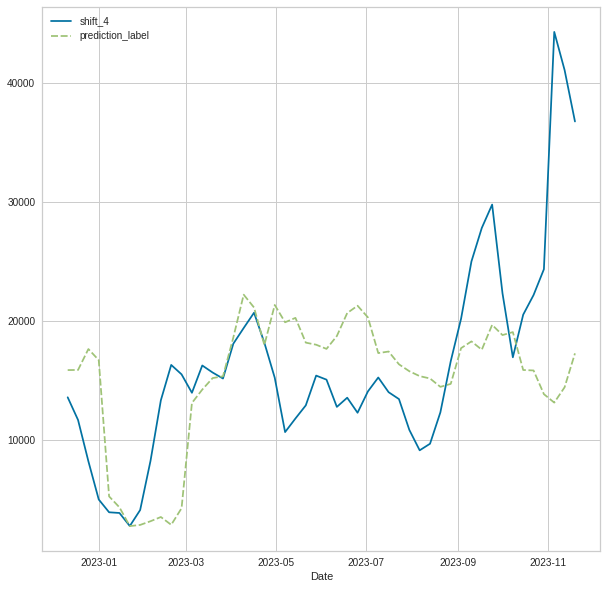

In [683]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.lineplot(data=Res[["shift_4","prediction_label"]])

In [429]:
Res=Res.sort_index()

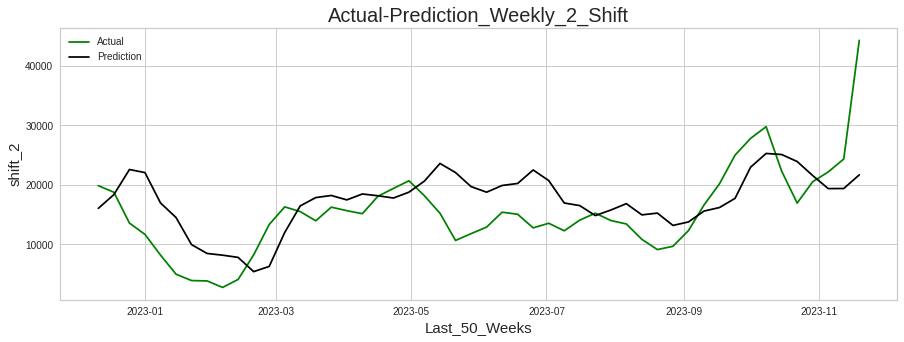

MAPE: 0.44201661823453314


In [805]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_2_Shift",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [261]:
pred2[["Value","shift_4","prediction_label"]]

Value       shift_4  prediction_label
Date                                                    
2023-06-25  15394.857422  12271.571429      15618.178662
2021-03-21  18491.857422  27396.857143      25872.850098
2019-11-10  21556.142578  24278.857143      19358.471543
2019-10-27  24560.142578  19170.000000      20622.046943
2023-04-02  13950.000000  18075.714286      18942.224404
...                  ...           ...               ...
2019-04-28   7916.143066  12216.142857       6884.084287
2021-01-03  16633.000000  17860.428571       8304.624229
2020-08-16  19680.285156  15470.714286      18567.063066
2020-02-09   3025.428467   2391.428571       4235.321443
2019-06-16  14225.142578  26780.571429      22441.446162

[61 rows x 3 columns]

In [268]:
X_Final[X_Final.index>"2021-03-20"]["Value"]>65000

Date
2021-03-21    False
2021-03-28    False
2021-04-04    False
2021-04-11    False
2021-04-18    False
              ...  
2023-10-22    False
2023-10-29    False
2023-11-05    False
2023-11-12    False
2023-11-19    False
Name: Value, Length: 140, dtype: bool

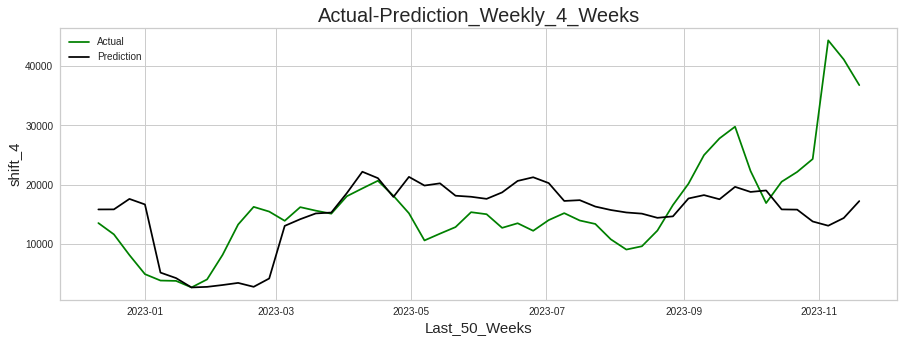

MAPE: 0.3969859225117533
directional_acc 68.0


In [684]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))
print("directional_acc",directional_acc(Res["prediction_label"],Res["shift_4"],T.Value))

In [806]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [807]:
directional_acc(Res["prediction_label"],Res["shift_4"],T["Value"])

54.0

In [187]:
V["Value"].iloc[-50:].tail()

Date
2019-12-22   -0.313620
2021-01-03   -0.192716
2018-06-17   -0.088087
2021-06-06    0.371471
2022-11-06   -0.689789
Name: Value, dtype: float32

In [188]:
Res.tail()

shift_4  prediction_label         diff       diff1_V  \
Date                                                                    
2019-12-22   8777.857422      13284.438564 -4506.581143   4934.428711   
2021-01-03  17860.427734      13001.237109  4859.190625   -987.572266   
2018-06-17  23544.000000      25327.983408 -1783.983408   5702.427734   
2021-06-06  31167.000000      30036.161602  1130.838398  28461.572266   
2022-11-06  13065.713867      15221.381631 -2155.667764   4287.856445   

                 diff1_P  
Date                      
2019-12-22   4577.172766  
2021-01-03    446.594199  
2018-06-17   6200.831768  
2021-06-06  26748.193040  
2022-11-06   1936.943066

In [448]:
Res["prediction_label"].tail()

Date
2023-10-22    16274.075771
2023-10-29    12999.847070
2023-11-05    12039.784258
2023-11-12    14026.037207
2023-11-19    16184.635791
Name: prediction_label, dtype: float64

In [1738]:
# Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [750]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_CCURQ', '5TC_C+1Q',
       'Value', 'Value_rollm_3', 'Value_rollm_7', 'Value_ewm_3', 'Value_ewm_7',
       'EMA_Value_ewm_3-Value_ewm_180', 'EMA_Value_ewm_3-Value_ewm_210',
       'EMA_Value_ewm_14-Value_ewm_150', 'EMA_Value_ewm_14-Value_ewm_180',
       'EMA_Value_ewm_14-Value_ewm_210', 'shift_4', '5TC_CCURMON_fshift_1',
       '5TC_C+1MON_fshift_1', '5TC_C+1MON_fshift_2', '5TC_C+1MON_fshift_3',
       '5TC_C+1MON_fshift_4', '5TC_C+2MON_fshift_1', '5TC_C+2MON_fshift_2',
       '5TC_C+2MON_fshift_3', '5TC_C+2MON_fshift_4', '5TC_CCURQ_fshift_1',
       '5TC_CCURMON_rollm_3', '5TC_CCURMON_rollm_4', '5TC_C+1MON_rollm_3',
       '5TC_C+1MON_rollm_4', '5TC_C+1MON_rollm_6', '5TC_C+1MON_rollm_8',
       '5TC_C+2MON_rollm_3', '5TC_C+2MON_rollm_4', '5TC_C+2MON_rollm_6',
       '5TC_C+2MON_rollm_8', '5TC_CCURQ_rollm_3', '5TC_CCURQ_rollm_4',
       '5TC_C+1Q_rollm_3', '5TC_C+1Q_rollm_4', 'Value_rollm_4',
       'Value_rollm_6', 'Value_ewm_3_r

In [234]:
Train=X_Final.iloc[:X_Final.shape[0]-50,:]
Test=X_Final.iloc[X_Final.shape[0]-50:,:]


In [235]:
Train.shape

(245, 53)

In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(Train.drop("shift_4",axis=1))

In [237]:
Y_train = np.reshape(np.array(Train.shift_4), (-1,1))
Y_train= scaler.fit_transform(Y_train) 

In [238]:
X_train.shape

Train.shape

Train.shape

(245, 53)

In [239]:
Y_train.shape

(245, 1)

In [240]:
Y_test = np.reshape(np.array(Test.shift_4), (-1,1))
Y_test_S= scaler.fit_transform(Y_test) 

In [241]:
X_test = scaler.fit_transform(Test.drop("shift_4",axis=1))

X_test.shape

(50, 52)

In [248]:
earlystop = EarlyStopping(monitor='train_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [249]:
X_train

array([[0.10778308, 0.16236781, 0.24142222, ..., 0.29332892, 0.27272727,
        0.23076923],
       [0.09040808, 0.14504974, 0.21851218, ..., 0.29253335, 0.27272727,
        0.25      ],
       [0.09271272, 0.16897033, 0.25393823, ..., 0.29976587, 0.27272727,
        0.26923077],
       ...,
       [0.10732415, 0.08765113, 0.02069816, ..., 0.02082061, 0.90909091,
        0.86538462],
       [0.11336832, 0.11466192, 0.0271288 , ..., 0.00883978, 0.90909091,
        0.88461538],
       [0.11589742, 0.06985951, 0.        , ..., 0.        , 1.        ,
        0.90384615]])

In [250]:
import tensorflow
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM
hl=[50,45]
model = Sequential()
model.add(LSTM(X_train.shape[0],input_shape = (X_train.shape[1],1),return_sequences = True,
                    activation = 'relu'))
for i in range(len(hl)-1):        
    model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
model.add(LSTM(hl[-1],activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3), loss = 'mean_squared_error')
#print(model.summary())

# Training the data
history = model.fit(X_train,Y_train,epochs =100,batch_size = 32,verbose = 1,shuffle = True, callbacks=callbacks_list)
train_loss=history.history['loss']

Epoch 1/100
8/8 [==============================] - 7s 343ms/step - loss: 0.0348
Epoch 2/100
8/8 [==============================] - 3s 328ms/step - loss: 0.0166
Epoch 3/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0142
Epoch 4/100
8/8 [==============================] - 3s 330ms/step - loss: 0.0128
Epoch 5/100
8/8 [==============================] - 3s 318ms/step - loss: 0.0124
Epoch 6/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0124
Epoch 7/100
8/8 [==============================] - 3s 326ms/step - loss: 0.0125
Epoch 8/100
8/8 [==============================] - 3s 327ms/step - loss: 0.0126
Epoch 9/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0122
Epoch 10/100
8/8 [==============================] - 3s 317ms/step - loss: 0.0122
Epoch 11/100
8/8 [==============================] - 3s 317ms/step - loss: 0.0119
Epoch 12/100
8/8 [==============================] - 3s 328ms/step - loss: 0.0121
Epoch 13/100
8/8 [===================

8/8 [==============================] - 3s 315ms/step - loss: 0.0116
Epoch 64/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0118
Epoch 65/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0115
Epoch 66/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0116
Epoch 67/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0118
Epoch 68/100
8/8 [==============================] - 2s 314ms/step - loss: 0.0114
Epoch 69/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0122
Epoch 70/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0117
Epoch 71/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0117
Epoch 72/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0116
Epoch 73/100
8/8 [==============================] - 3s 326ms/step - loss: 0.0120
Epoch 74/100
8/8 [==============================] - 3s 317ms/step - loss: 0.0116
Epoch 75/100
8/8 [=======================

In [251]:
# from keras.models import Sequential
# from keras.callbacks import EarlyStopping
# from keras.layers import Dense
# from keras.layers import SimpleRNN
# from keras.layers import Dropout
# from keras.layers import GRU, Bidirectional
# from keras.optimizers import SGD
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error

# from keras.layers import LSTM

# model = Sequential()
# model.add(LSTM(X_train.shape[0], return_sequences=True, input_shape=(X_train.shape[1],1),activation='tanh'))

# # model.add(Dense(units=5))
# # model.add(Dropout(0.2))
# # model.add(LSTM(50,return_sequences=True,activation='tanh'))

# # model1.add(LSTM(10,return_sequences=True))
# model.add(LSTM(25))
# model.add(Dense(units=1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # model = Sequential()

# # model.add(LSTM(150,return_sequences=True,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', batch_input_shape=(1,X_train.shape[1],1), stateful=True))
# # model.add(Dropout(0.3))
# # model.add(LSTM(25, batch_input_shape=(1,X_train.shape[1],1), kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',stateful=True))
# # model.add(Dropout(0.3))
# # model.add((Dense(1)))
# # model.compile(loss='mse', optimizer='adam')


# model.summary()

# # from keras.callbacks import ModelCheckpoint,EarlyStopping
# # file="weights.best_Baisc.hdf5"
# # checkpoint = ModelCheckpoint(file, monitor='loss', verbose=1, save_best_only=True, mode='min')
# # early_stop =  EarlyStopping(monitor='loss', min_delta=0.001, patience=200, verbose=1, mode='min')
# # callbacks = [checkpoint,early_stop]

In [196]:
X_test_2 = scaler.fit_transform(Test.iloc[:,:])

In [198]:
model.fit(X_train, Y_train, epochs =250, batch_size = 80,callbacks=callbacks_list)

Epoch 1/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0124
Epoch 2/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0122
Epoch 3/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0122
Epoch 4/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0122
Epoch 5/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0121
Epoch 6/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0121
Epoch 7/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0121
Epoch 8/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0122
Epoch 9/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0120
Epoch 10/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0120
Epoch 11/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0121
Epoch 12/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0121
Epoch 13/250
3/3 [===================

3/3 [==============================] - 1s 354ms/step - loss: 0.0118
Epoch 33/250
3/3 [==============================] - 1s 390ms/step - loss: 0.0118
Epoch 34/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0119
Epoch 35/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0118
Epoch 36/250
3/3 [==============================] - 1s 357ms/step - loss: 0.0118
Epoch 37/250
3/3 [==============================] - 1s 392ms/step - loss: 0.0118
Epoch 38/250
3/3 [==============================] - 1s 357ms/step - loss: 0.0118
Epoch 39/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0118
Epoch 40/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0118
Epoch 41/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0120
Epoch 42/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0119
Epoch 43/250
3/3 [==============================] - 1s 396ms/step - loss: 0.0118
Epoch 44/250
3/3 [=======================

3/3 [==============================] - 1s 352ms/step - loss: 0.0118
Epoch 96/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0117
Epoch 97/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0117
Epoch 98/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0116
Epoch 99/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0116
Epoch 100/250
3/3 [==============================] - 1s 350ms/step - loss: 0.0116
Epoch 101/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0116
Epoch 102/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0116
Epoch 103/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0115
Epoch 104/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0116
Epoch 105/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0115
Epoch 106/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0115
Epoch 107/250
3/3 [===============

3/3 [==============================] - 1s 349ms/step - loss: 0.0115
Epoch 128/250
3/3 [==============================] - 1s 310ms/step - loss: 0.0104
Epoch 129/250
3/3 [==============================] - 1s 310ms/step - loss: 0.0105
Epoch 130/250
3/3 [==============================] - 1s 309ms/step - loss: 0.0104
Epoch 131/250
3/3 [==============================] - 1s 346ms/step - loss: 0.0100
Epoch 132/250
3/3 [==============================] - 1s 346ms/step - loss: 0.0100
Epoch 133/250
3/3 [==============================] - 1s 346ms/step - loss: 0.0112
Epoch 134/250
3/3 [==============================] - 1s 347ms/step - loss: 0.0102
Epoch 135/250
3/3 [==============================] - 1s 312ms/step - loss: 0.0104
Epoch 136/250
3/3 [==============================] - 1s 309ms/step - loss: 0.0112
Epoch 137/250
3/3 [==============================] - 1s 348ms/step - loss: 0.0094
Epoch 138/250
3/3 [==============================] - 1s 408ms/step - loss: 0.0106
Epoch 139/250
3/3 [===========

3/3 [==============================] - 1s 354ms/step - loss: 0.0099
Epoch 159/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0103
Epoch 160/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0091
Epoch 161/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0095
Epoch 162/250
3/3 [==============================] - 1s 351ms/step - loss: 0.0087
Epoch 163/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0086
Epoch 164/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0082
Epoch 165/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0082
Epoch 166/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0088
Epoch 167/250
3/3 [==============================] - 1s 351ms/step - loss: 0.0081
Epoch 168/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0080
Epoch 169/250
3/3 [==============================] - 2s 553ms/step - loss: 0.0076
Epoch 170/250
3/3 [===========

3/3 [==============================] - 1s 356ms/step - loss: 0.0090
Epoch 191/250
3/3 [==============================] - 1s 395ms/step - loss: 0.0068
Epoch 192/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0072
Epoch 193/250
3/3 [==============================] - 1s 393ms/step - loss: 0.0069
Epoch 194/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0066
Epoch 195/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0069
Epoch 196/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0065
Epoch 197/250
3/3 [==============================] - 1s 394ms/step - loss: 0.0069
Epoch 198/250
3/3 [==============================] - 1s 398ms/step - loss: 0.0067
Epoch 199/250
3/3 [==============================] - 1s 409ms/step - loss: 0.0065
Epoch 200/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0064
Epoch 201/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0068
Epoch 202/250
3/3 [===========

3/3 [==============================] - 1s 354ms/step - loss: 0.0061
Epoch 222/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0061
Epoch 223/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0061
Epoch 224/250
3/3 [==============================] - 1s 358ms/step - loss: 0.0059
Epoch 225/250
3/3 [==============================] - 1s 391ms/step - loss: 0.0060
Epoch 226/250
3/3 [==============================] - 1s 392ms/step - loss: 0.0060
Epoch 227/250
3/3 [==============================] - 1s 358ms/step - loss: 0.0060
Epoch 228/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0059
Epoch 229/250
3/3 [==============================] - 1s 391ms/step - loss: 0.0059
Epoch 230/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0058
Epoch 231/250
3/3 [==============================] - 1s 387ms/step - loss: 0.0059
Epoch 232/250
3/3 [==============================] - 1s 357ms/step - loss: 0.0059
Epoch 233/250
3/3 [===========

In [212]:
y_RNN = model.predict(X_test)

3/3 [==============================] - 1s 64ms/step


In [218]:
y_RNN.shape

(70, 1)

In [216]:
X_test.shape

(70, 52)

In [224]:
prediction_copies = np.repeat(y_RNN, X_test.shape[1], axis=-1)

In [225]:
prediction_copies.shape

(70, 52)

In [229]:
# # invert scaling for forecast

Y_Rnn_n = scaler.inverse_transform(prediction_copies)[:,0]

In [230]:
Y_Rnn_n

array([13817.819 , 13573.28  , 13061.629 , 12197.416 , 10906.373 ,
        9665.088 ,  8749.572 ,  8185.226 ,  8243.065 ,  8831.687 ,
        9505.752 ,  9899.295 ,  9851.1045,  9548.359 ,  9162.126 ,
        8637.792 ,  8222.185 ,  7782.018 ,  7509.0225,  7338.139 ,
        7302.9297,  7444.3823,  7735.593 ,  7750.958 ,  7763.885 ,
        7703.1885,  7455.02  ,  6930.125 ,  6480.895 ,  6104.0596,
        5772.039 ,  5682.795 ,  6172.377 ,  6946.4043,  7940.088 ,
        8854.422 ,  9638.523 , 10409.308 , 10905.926 , 11127.317 ,
       11412.079 , 11729.414 , 11965.382 , 11942.632 , 11693.776 ,
       11273.581 , 10813.329 , 10465.879 , 10371.832 , 10466.855 ,
       10326.284 , 10223.673 ,  9936.546 ,  9805.508 ,  9883.356 ,
        9965.382 , 10086.874 ,  9871.87  ,  9574.696 ,  9377.122 ,
        9359.178 ,  9744.039 , 10305.664 , 10652.522 , 10855.821 ,
       11013.1875, 10912.511 , 10469.515 , 10091.272 ,  9945.324 ],
      dtype=float32)

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

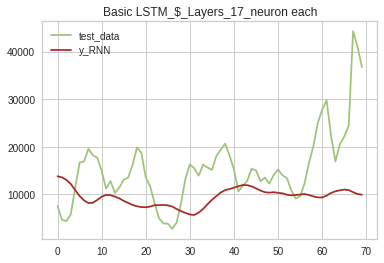

In [233]:
plt.plot(Y_test, label = "test_data", color = "g")
plt.plot(Y_Rnn_n, label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [232]:
res=pd.DataFrame()

In [170]:
res["pred"]=Y_Rnn_n
res["Actual"]=Y_test

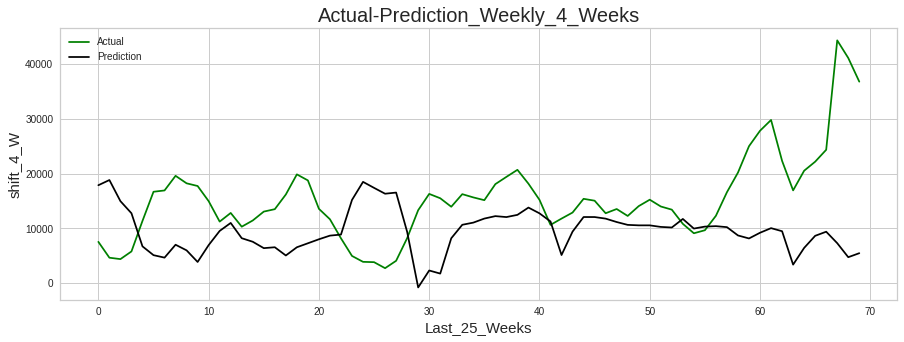

MAPE: 0.7426822084241785


In [187]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(res["Actual"],color="green",label="Actual")
plt.plot(res["pred"],color="black",label="Prediction")
plt.xlabel("Last_25_Weeks",fontdict=font2)
plt.ylabel("shift_4_W",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(res["pred"].shape[0]):
    Mape.append((np.abs((res["Actual"].iloc[i] - res['pred'].iloc[i]) / res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [820]:
X_test

array([[0.76621145, 1.        , 1.        , ..., 1.        , 0.54545455,
        0.54901961],
       [0.6716166 , 0.77260729, 0.84006885, ..., 0.93770096, 0.54545455,
        0.56862745],
       [0.46077043, 0.67241615, 0.70916627, ..., 0.84218751, 0.63636364,
        0.58823529],
       ...,
       [0.57757816, 0.43090763, 0.19770763, ..., 0.1494706 , 0.90909091,
        0.84313725],
       [0.641917  , 0.49195224, 0.20644263, ..., 0.13016245, 0.90909091,
        0.8627451 ],
       [0.72315815, 0.58332196, 0.26785196, ..., 0.12682925, 0.90909091,
        0.88235294]])

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

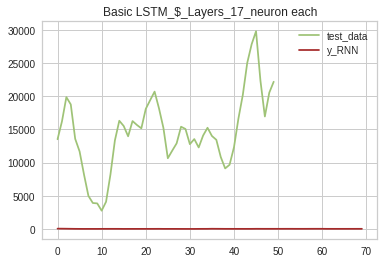

In [821]:
plt.plot(np.array(X_Final["Value"].iloc[-50:]), label = "test_data", color = "g")
plt.plot( Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [822]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)
inv_yhat

array([[0.76621145, 1.        , 1.        , ..., 0.54545455, 0.54901961,
        0.87827438],
       [0.6716166 , 0.77260729, 0.84006885, ..., 0.54545455, 0.56862745,
        0.78828382],
       [0.46077043, 0.67241615, 0.70916627, ..., 0.63636364, 0.58823529,
        0.63022149],
       ...,
       [0.57757816, 0.43090763, 0.19770763, ..., 0.90909091, 0.84313725,
        0.28745136],
       [0.641917  , 0.49195224, 0.20644263, ..., 0.90909091, 0.8627451 ,
        0.31933236],
       [0.72315815, 0.58332196, 0.26785196, ..., 0.90909091, 0.88235294,
        0.31800979]])

In [823]:
# # invert scaling for forecast
inv_yhat = np.concatenate( [X_test,Y_Rnn_n[:,-1].reshape(-1,1)], axis=1)
Y_Rnn_n = scaler.inverse_transform(inv_yhat)



In [331]:
Y_Rnn_n[:,0]

array([18089.        , 18089.        , 18089.        , 16945.28571429,
       10083.        , 10083.        , 10083.        , 10083.        ,
        8050.85714286,  7238.        ,  7238.        ,  7238.        ,
       14176.57142857, 16952.        , 16952.        , 16952.        ,
       16338.28571429, 14804.        , 14804.        , 14804.        ,
       14804.        , 18982.        , 18982.        , 18982.        ,
       18982.        , 18043.14285714, 17339.        , 17339.        ,
       17339.        , 16229.28571429, 13455.        , 13455.        ,
       13455.        , 13455.        , 11512.71428571, 11189.        ,
       11189.        , 11189.        , 13509.71428571, 16604.        ,
       16604.        , 16604.        , 17896.28571429, 25650.        ,
       25650.        , 25650.        , 25650.        , 25212.85714286,
       25038.        , 25038.        ])

In [332]:
Tag_f["Value"].iloc[-50:]

Date
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142857
2023-08-27    10833.142857
2023-09-03     9113.857143
2023-09-10     9666.857143
2023-09-17    12305.857

In [333]:
X_Final["Value"].iloc[-50:]

Date
2022-12-11    13507.285714
2022-12-18    16186.142857
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142

In [334]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [335]:
directional_acc(pd.DataFrame(Y_Rnn_n[:,-1]).values,pd.DataFrame(Y_test).values,X_Final["Value"].iloc[-50:].values)

2582.0

In [336]:
Mape=[]
for i  in range(len(Y_Rnn_n[:,-1])):
    Mape.append((Y_test[i] - Y_Rnn_n[:,-1][i]) / X_Final["Value"].iloc[-50:][i])

print("MAPE:",np.mean(Mape))

MAPE: -27432.871566582893


In [337]:
pd.DataFrame(Y_Rnn_n[:,-1])

0
0   1.499569e+08
1   2.111037e+08
2   2.373878e+08
3   2.034522e+08
4   1.768357e+08
5   1.811203e+08
6   2.015297e+08
7   1.888777e+08
8   2.246659e+08
9   2.947726e+08
10  3.319687e+08
11  4.378865e+08
12  5.116076e+08
13  5.197210e+08
14  5.571692e+08
15  5.550470e+08
16  5.850797e+08
17  6.080375e+08
18  5.696401e+08
19  4.997347e+08
20  4.218635e+08
21  4.333332e+08
22  4.346303e+08
23  4.073970e+08
24  3.893416e+08
25  3.718315e+08
26  3.465048e+08
27  2.219048e+08
28  1.622459e+08
29  2.448935e+08
30  2.343050e+08
31  2.302978e+08
32  2.035452e+08
33  2.005621e+08
34  1.913361e+08
35  1.941008e+08
36  2.012675e+08
37  1.752382e+08
38  1.819809e+08
39  2.325479e+08
40  2.475317e+08
41  2.535341e+08
42  2.644200e+08
43  2.715394e+08
44  2.853899e+08
45  3.204408e+08
46  3.383167e+08
47  3.929773e+08
48  4.271810e+08
49  4.748596e+08

In [185]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
    model.add(SimpleRNN(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
    #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

def forecast(model,train,n_days_for_forecast):
    X_train = []
    Y_train = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    n_days_for_prediction=n_days_for_forecast
    prediction = model.predict(X_train[-n_days_for_prediction:])
    prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
    y_pred_future = sc.inverse_transform(prediction_copies)[:,0]

    forecast_dates = []
    for time_i in predict_period_dates:
        forecast_dates.append(time_i.date())

    df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
    df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
#     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
    return df_forecast

# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)

    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)

    bdp =1- np.round(np.min(np.abs(Y_hat-Y_test)/ Y_test),2)
    ldp =1- np.round(np.max(np.abs(Y_hat-Y_test)/ Y_test),2)


    mape = mean_absolute_percentage_error(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat, mape, bdp*100, np.clip(ldp,0.7,1)*100

# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.figure(figsize = (20,7))
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title("Price Prediction using Multivatiate-RNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.figure(figsize = (20,7))
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()


In [186]:
series = df
print(series.shape)
print(series.tail())
        
 

(4200, 8)
            Date  FFACapeO010118  C3010118  C5010118  C5TC010118  020707  \
4195  14/12/2017             NaN       NaN       NaN         NaN  1281.0   
4196  15/12/2017             NaN       NaN       NaN         NaN  1281.0   
4197  27/12/2017             NaN       NaN       NaN         NaN  2219.0   
4198  28/12/2017             NaN       NaN       NaN         NaN  2219.0   
4199  29/12/2017             NaN       NaN       NaN         NaN  2219.0   

      010118  CapeOI010118  
4195     NaN           NaN  
4196     NaN           NaN  
4197     NaN           NaN  
4198     NaN           NaN  
4199     NaN           NaN  


In [ ]:
       
        n_past = 15
        n_days_for_prediction=90
        train_data = series[:int(len(series)*0.8)].dropna()
        val_data = series[int(len(series)*0.8):int(len(series)*0.9)].dropna()
        test_data = series[int(len(series)*0.9):int(len(series)*1)].dropna()
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        print(train_data.shape,val_data.shape,test_data.shape)
        
        
         # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        test = sc.transform(test_data)
        print(train.shape,val.shape,test.shape)
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 124
        num_epochs = 10
        
        model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
        #plot_error(train_error,val_error)
        
        mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,test,30)
        # print('MSE = {}'.format(mse))
        # print('RMSE = {}'.format(rmse))
        # print('R-Squared Score = {}'.format(r2_value))
        # print('MAPE Score = {}'.format(mape))
        # print('BDP = {}'.format(bdp))
        # print('LDP = {}'.format(ldp))
        
        #plot_data(true,predicted)
        
        true = true.reshape(-1, 1)
        predicted = predicted.reshape(-1, 1)
        cols = list(series)[0:35]
        df_for_training = df[cols].astype(float)
        true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
        predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)
        
        
        
        actualvalue = sc.inverse_transform(true_copies)[:,0]
        predictedvalue = sc.inverse_transform(predicted_copies)[:,0]
        
        
        actualvalue = actualvalue.tolist()
        predictedvalue = predictedvalue.tolist()
        actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
        resultant_dfalt = resultant_df.reset_index(level=0)
        li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
        actualVSpredicted['Dates'] = pd.DataFrame({'col':li})
        
        
        
        n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []